Shill bidding is a form of auction fraud, consisting of intentionally bidding on a product in order to inflate the final price. The goal of this project is to build a model to accurately classify a bidder as a shill bidder or a legitimate bidder. <br> <br>The data set used came from the UCI machine learning repository. The data contains the attributes successive outbidding, last bidding, auction bids, auction starting price, early bidding, winning ratio, auction duration, and class (0 for normal, 1 for otherwise). The data set and variable information can be found here: https://archive.ics.uci.edu/dataset/562/shill+bidding+dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [48]:
df = pd.read_csv('Shill-Bidding-Dataset.csv')

In [51]:
print(df.duplicated().sum())
print(df.isnull().values.any())

0
False


There are 0 duplicates in this data and no missing values.

In [59]:
df = df.drop(columns = ["Record_ID", "Auction_ID", "Bidder_ID"])

In [60]:
df.describe()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


6321
0.8932130991931656


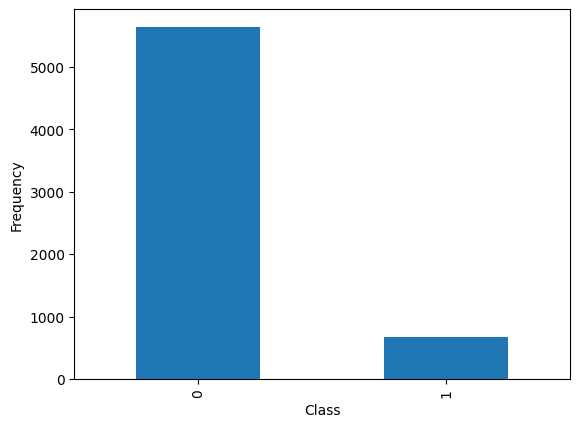

In [40]:
class_counts = df['Class'].value_counts()
print(sum(class_counts))
print(class_counts[0]/sum(class_counts))
class_counts.plot(kind = 'bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


There is 6,321 total instances, with a majority of normal bidding (89 percent).

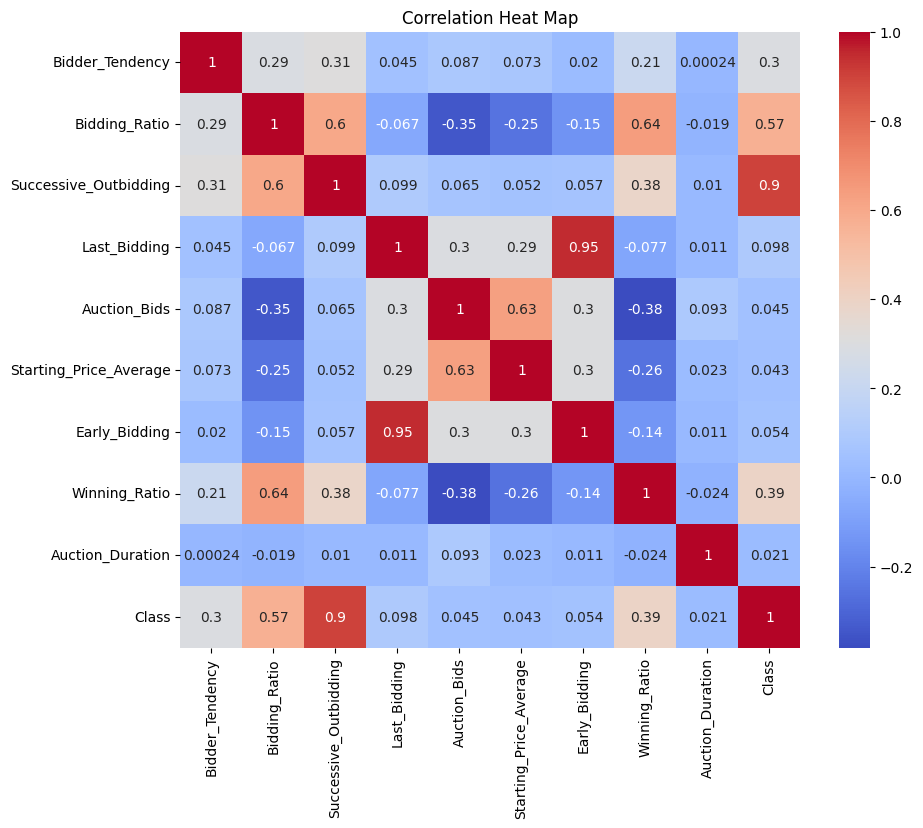

In [30]:
corr_matrix = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title("Correlation Heat Map")
plt.show()

As a whole there appears to be low correlation amongst the variables. The class variable has a strong positive correlation with successive outbidding (.9) and a moderate positive correlation with bidding ratio (.57). It appears that successive outbidding and bidding ratio are related with the type of bidder.

In [31]:
X = df.drop('Class', axis = 1)
X = X.to_numpy()
y = df.Class
y = y.to_numpy()

For our model selection, we decided to implement four popular classification algorithms- naive bayes, logistic regression, support vector machines, and random forests.

In [61]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5, random_state = 3)
model = GaussianNB()
model.fit(X_train, y_train)
y_predNB = model.predict(X_test)

target_names = ['Normal Bidding', 'Otherwise']
print("Gaussian Naive Bayes:")
print(classification_report(y_test, y_predNB, target_names=target_names))
print("Predictions: ", model.predict(X_test))
print('Gaussian Naive Bayes score: ', model.score(X_test, y_test))

Gaussian Naive Bayes:
                precision    recall  f1-score   support

Normal Bidding       1.00      0.97      0.98      2808
     Otherwise       0.79      0.99      0.88       353

      accuracy                           0.97      3161
     macro avg       0.90      0.98      0.93      3161
  weighted avg       0.98      0.97      0.97      3161

Predictions:  [1 0 0 ... 0 0 0]
Gaussian Naive Bayes score:  0.9699462195507751


Gaussian Naive Bayes has a 96.99% overall accuracy, however precision for otherwise (shill bidding) is noticeably lower at 79%.

In [35]:
from sklearn.linear_model import LogisticRegression
logRegClassifier = LogisticRegression()
logRegClassifier.fit(X_train, y_train)

y_predLR = logRegClassifier.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_predLR, target_names=target_names))
print("Predictions: ", logRegClassifier.predict(X_test))
print('Logistic Regression score: ', logRegClassifier.score(X_test, y_test))

Logistic Regression:
                precision    recall  f1-score   support

Normal Bidding       0.98      0.99      0.99      2808
     Otherwise       0.89      0.87      0.88       353

      accuracy                           0.97      3161
     macro avg       0.94      0.93      0.93      3161
  weighted avg       0.97      0.97      0.97      3161

Predictions:  [1 0 0 ... 0 0 0]
Logistic Regression score:  0.9734261309712117

*******************************************************



Logistic regression slightly improves on the previous model with a 97.34% accuracy. Precision for shill bidding is improved (+10%) while recall is slightly worse (-12%).

In [36]:
from sklearn import svm
svmClassifier = svm.SVC(kernel='linear')
svmClassifier.fit(X_train, y_train)

y_predSVM = svmClassifier.predict(X_test)
print("Support Vector Machines: ")
print(classification_report(y_test, y_predSVM, target_names=target_names))
print("Predictions: ", svmClassifier.predict(X_test))
print('SVM score: ', svmClassifier.score(X_test, y_test))
print("\n*******************************************************\n")

Support Vector Machines: 
                precision    recall  f1-score   support

Normal Bidding       1.00      0.98      0.99      2808
     Otherwise       0.85      0.99      0.91       353

      accuracy                           0.98      3161
     macro avg       0.92      0.98      0.95      3161
  weighted avg       0.98      0.98      0.98      3161

Predictions:  [1 0 0 ... 0 0 0]
SVM score:  0.9788041758937045

*******************************************************



Support vector machines performs similarly to logistic regression. 

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfClassifier = RandomForestClassifier()
rfClassifier.fit(X_train, y_train)
y_predrf = rfClassifier.predict(X_test)

print("Random Forest Classifier:")
print(classification_report(y_test, y_predrf, target_names=target_names))
print("Predictions: ", rfClassifier.predict(X_test))
print('Random Forrest score: ', rfClassifier.score(X_test, y_test))
print("\n*******************************************************\n")

Random Forest Classifier:
                precision    recall  f1-score   support

Normal Bidding       1.00      0.99      1.00      2808
     Otherwise       0.96      0.99      0.97       353

      accuracy                           0.99      3161
     macro avg       0.98      0.99      0.98      3161
  weighted avg       0.99      0.99      0.99      3161

Predictions:  [1 0 0 ... 0 0 0]
Random Forrest score:  0.9933565327428029

*******************************************************



Random Forest performs the best out of the models chosen. The overall accuracy is 99.33 %, with > 96 % for precision, recall, and F1 score. The model correctly predicted 96% of all shill bidding cases while only flagging 1% of normal bidders as illegitimate. <br> <br> Random forest is a viable classification method for determining the legitimacy of an auction bidder. This model can effectively assist auction sites in identifying, investigating, and banning shill bidders, safeguarding legitimate bidders from artificially inflated prices.